# Bibliotecas

In [119]:
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import *
import numpy as np

# Importando o Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/anasuyapaul/Car_Sales_Dataset_Analysis-/main/Car_dekho.csv'

data = pd.read_csv(url, sep=',', encoding='utf8')

df = pd.DataFrame(data)

df.head()

In [ ]:
# Tipos de dados do meu dataset
tipos_dados = pd.DataFrame(df.dtypes, columns=['Tipos de dados'])
tipos_dados.columns.name = 'Variáveis'
tipos_dados

In [ ]:
# Maneiras de se obter informações sobre o dataset
print(f'A base de dados apresenta {df.shape[0]} registros e {df.shape[1]} campos')

# 2 maneira
print('A base de dados apresenta {} registros e {} campos'.format(df.shape[0], df.shape[1]))

In [ ]:
# Selecionando os campos do meu dataframe
df[['year', 'selling_price', 'km_driven']].describe().round().T

# .LOC para seleções
Seleciona um grupo de linhas e colunas segundo os rótulos ou uma matriz booleana.

In [ ]:
df_pd = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])

df_pd.head(5)

In [ ]:
df_pd.loc['viper']

# .ILOC para seleções
Seleciona com base nos índices, ou seja, se baseia na posição das informações

In [ ]:
df_pd.iloc[0]

In [ ]:
df_pd.iloc[[0, 1]]

In [ ]:
df[(df.Name == 'Maruti Alto 800 LXI Opt') & (df.year == 2023)]

In [ ]:
list(df.iterrows())

In [ ]:
for index, row in df.iterrows():
    if(2023 - row['year'] != 0):
        df.loc[index, 'km_media'] = row['km_driven'] / (2023 - row['year'])
    else:
        df.loc[index, 'km_media'] = 0
df

In [ ]:
df[df.year.isna()]

In [ ]:
df.describe()

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.dropna(subset=['year'], inplace=True)

# Obtendo dados da WEB

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url='https://www.federalreserve.gov/releases/h3/current/default.htm'
response = requests.get(url)
html = response.content
soup = BeautifulSoup(html, 'html.parser')
table = soup.findAll('table')
html_file = f'<html><body>{table}</body></html>'
df = pd.read_html(html_file)

# Como a função read_html retorna uma lista de DataFrames, basta acessar as tabelas pelos índices da lista.
# Como temos três tabelas na página usamos os índices 0, 1 ou 2 para acessar os DataFrames que buscamos
df[0]

# Lendo formatados variados das fontes de dados

## **Como ler fontes de dados diferentes:**
- Uma base CSV ( pd.read_csv(...) )
- Uma base JSON ( pd.read_json(...) )
- Uma base TXT ( pd.read_table(...) )
- Um arquivo EXCEL ( pd.read_excel(...) )
- Uma página HTML ( pd.read_html(...) )

## **Vários métodos e atributos úteis de dataframes, como:**
- info()
- head()
- dtypes
- columns
- shape

In [ ]:
import pandas as pd

In [ ]:
# JSON
json = open('/data/notebook_files/dados_variados/aluguel.json')
# print(json.read()) imprimir o formato bruto do arquivo JSON

df_json = pd.read_json(json) # JSON
df_json

In [ ]:
txt = open('/data/notebook_files/dados_variados/aluguel.txt')
# print(txt.read()) imprimir o formato bruto do arquivo TXT

df_txt = pd.read_table(txt) # Table (TXT)
df_txt

In [ ]:
df_xlsx = pd.read_excel('/data/notebook_files/dados_variados/aluguel.xlsx') 
# Arquivos do Excel para CSV pd.read_csv()

df_xlsx

In [ ]:
df_html = pd.read_html('/data/notebook_files/dados_variados/dados_html_2.html') # Leitura de arquivo HTML
df_html[0]

In [ ]:
dir(dict)

In [ ]:
help(dict.pop)

In [ ]:
# Reindexando o index do meu dataframe

# for i in range(df.shape[0]):
#     print(i)

# df.index = range(len(df))

df.index = range(df.shape[0])
df.index

df.columns.name ='Id' # alterando o nome da coluna do index
df

In [ ]:
# Series

exempleOne = [1, 2, 3, 4, 5, 6, 7, 8, 9]

series = pd.Series(data)

# criando index para uma Series

index = ['Linha ' + str(i) for i in range(len(series))] # list comprehension

series = pd.Series(data=data, index=index)

series


In [ ]:
# Estrutura de dados DataFrame

exempleTwo = ([1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15])

df1 = pd.DataFrame(data = exempleTwo)

index = ['Linha ' + str(i) for i in range(len(df1))]
columns = ['Coluna ' + str(i) for i in range(len(df1.columns))]

df1 = pd.DataFrame(data = exempleTwo, index=index, columns=columns)

df1


# Importando um dataframe do Kaggle


In [ ]:
# Importando os dados do Kaggle

!kaggle datasets download -d rubenssjr/brasilian-houses-to-rent
!sudo unzip brasilian-houses-to-rent.zip -d ./data/

In [61]:
data = pd.read_csv('/workspaces/datascience-repo/Notebooks/data/houses_to_rent.csv')

for i in data.columns:
    print(i)


city
area
rooms
bathroom
parking spaces
floor
animal
furniture
hoa (R$)
rent amount (R$)
property tax (R$)
fire insurance (R$)
total (R$)


In [62]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [64]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [65]:
# Convertendo o tipo de dado de uma coluna de Object para Int64
data['floor'] = data['floor'].replace(['-', 'NaN'], '0').astype(int)

print(data['floor'].dtype)

int64


In [66]:
dict_eng_port = {
    'city': 'cidade',
    'area': 'area',
    'rooms': 'quartos',
    'bathroom': 'banheiros',
    'parking spaces': 'vagas estacionamento',
    'floor': 'andar',
    'animal': 'animal',
    'furniture': 'mobiliado',
    'hoa (R$)': 'condominio',
    'rent amount (R$)': 'aluguel',
    'property tax (R$)': 'iptu',
    'fire insurance (R$)': 'seguro incendio',
    'total (R$)': 'total'

}

data = data.rename(columns=dict_eng_port)

data.head()

,cidade,area,quartos,banheiros,vagas estacionamento,andar,animal,mobiliado,condominio,aluguel,iptu,seguro incendio,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [67]:
print(data['mobiliado'].value_counts())
print('----------------->')
print(data['animal'].value_counts())

mobiliado
not furnished    8086
furnished        2606
Name: count, dtype: int64
----------------->
animal
acept        8316
not acept    2376
Name: count, dtype: int64


In [68]:
data['mobiliado'] = data['mobiliado'].replace({'furnished': '1', 'not furnished': '2'}).astype(int)

In [82]:
data['animal'] = data['animal'].replace({'acept': '1', 'not acept': '2'}).astype(int)

In [83]:
for column, dtype in data.dtypes.items():
    print(f'Tipo {dtype}, Coluna {column}')


Tipo object, Coluna cidade
Tipo int64, Coluna area
Tipo int64, Coluna quartos
Tipo int64, Coluna banheiros
Tipo int64, Coluna vagas estacionamento
Tipo int64, Coluna andar
Tipo int64, Coluna animal
Tipo int64, Coluna mobiliado
Tipo int64, Coluna condominio
Tipo int64, Coluna aluguel
Tipo int64, Coluna iptu
Tipo int64, Coluna seguro incendio
Tipo int64, Coluna total


In [84]:
data.head()

,cidade,area,quartos,banheiros,vagas estacionamento,andar,animal,mobiliado,condominio,aluguel,iptu,seguro incendio,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,2,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,2,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,2,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,2,2,0,800,25,11,836


In [100]:
data['vagas estacionamento'].value_counts()

vagas estacionamento
1     3630
0     2683
2     2070
3      968
4      789
5      230
6      163
8      123
7       33
10       2
12       1
Name: count, dtype: int64

In [116]:
# Condições para substituir valores de uma coluna

# Substituindo valores de uma coluna com base em uma valor
data['condominio'] = data['condominio'].replace(3, 0)

# Substituindo valores de uma coluna com base em uma condição
data.loc[data['condominio'] < 21, 'condominio'] = 0

In [127]:
# verificando se a substituição foi feita corretamente
result = data[data['condominio'] < 21]
print(result.head())


       cidade  area  quartos  banheiros  vagas estacionamento  andar  animal  \
4   São Paulo    25        1          1                     0      1       2   
5   São Paulo   376        3          3                     7      0       1   
19  São Paulo   600        4          5                     6      0       1   
20  São Paulo   100        7          4                     0      0       1   
23  São Paulo    35        1          1                     0      0       1   

    mobiliado  condominio  aluguel  iptu  seguro incendio  total  
4           2           0      800    25               11    836  
5           2           0     8000   834              121   8955  
19          2           0    12000  9500              181  21680  
20          2           0     3800   118               58   3976  
23          2           0     1100     3               14   1117  


In [129]:
data['cidade'].value_counts()

cidade
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: count, dtype: int64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Valores de Aluguel por Cidade')

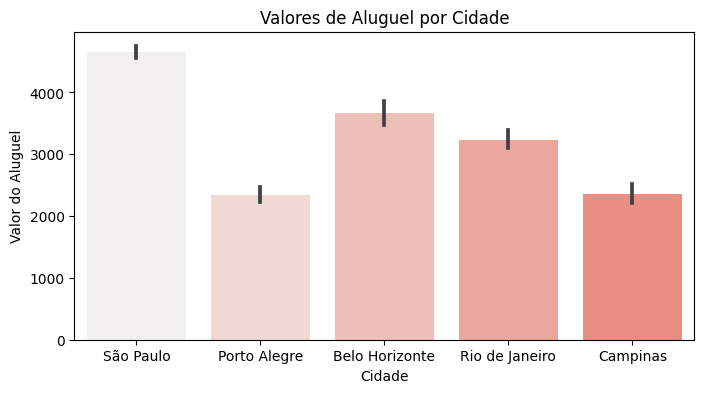

In [152]:
# Gráfico para visualizar a distribuição dos dados de aluguel por cidade

data_sorted = data.sort_values(by='aluguel', ascending=False)

ax = sns.barplot(x='cidade', y='aluguel', data=data_sorted, palette='light:salmon')
ax.figure.set_size_inches(8, 4)

plt.xlabel('Cidade')
plt.ylabel('Valor do Aluguel')
plt.title('Valores de Aluguel por Cidade')

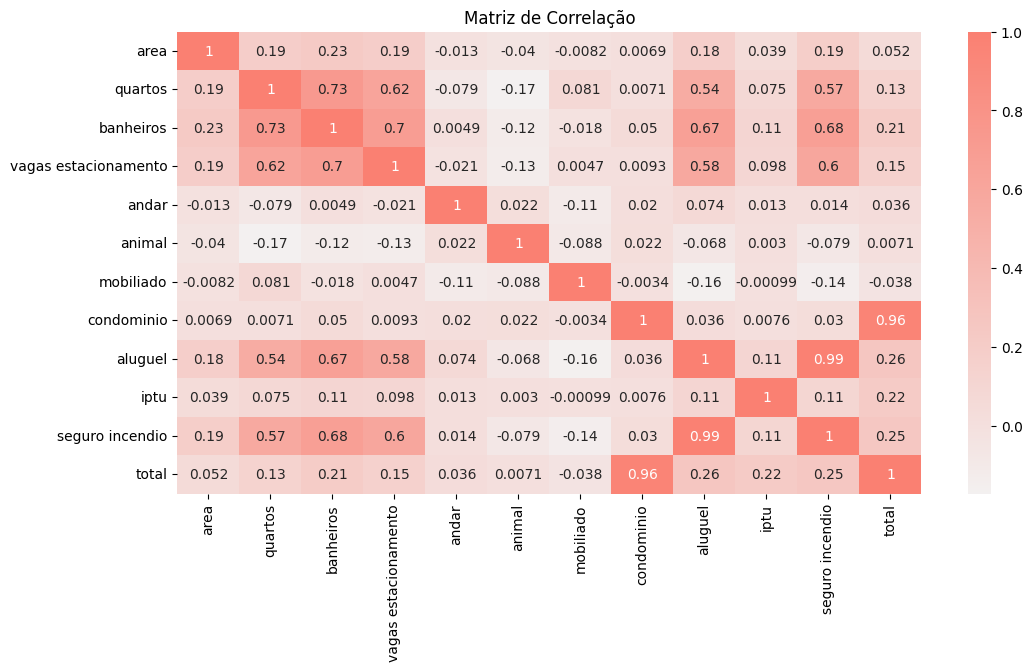

In [151]:
# matriz de correlação

data_corr = data.drop(['cidade'], axis=1)

plt.figure(figsize=[12, 6])
paleta = sns.color_palette('light:salmon', as_cmap=True)
sns.heatmap(data_corr.corr(), annot=True, cmap=paleta)
plt.title('Matriz de Correlação')
plt.show()